# K-means Clustering

In the k-means algorithm, it is important to remember that the initial cluster centers are chosen randomly. As a result, the clustering outcomes can vary from one run to another, particularly when dealing with data samples that overlap. To address this issue, one approach is to run the k-means algorithm multiple times.





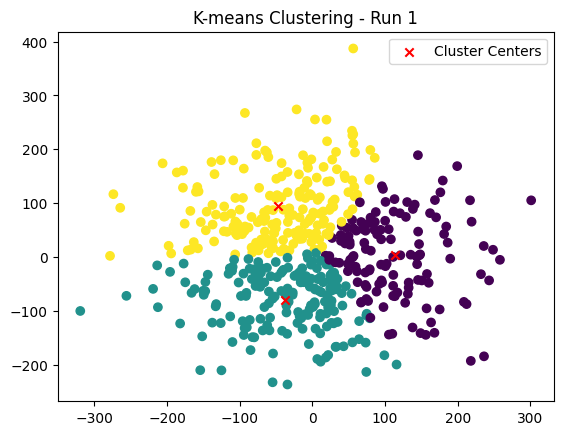

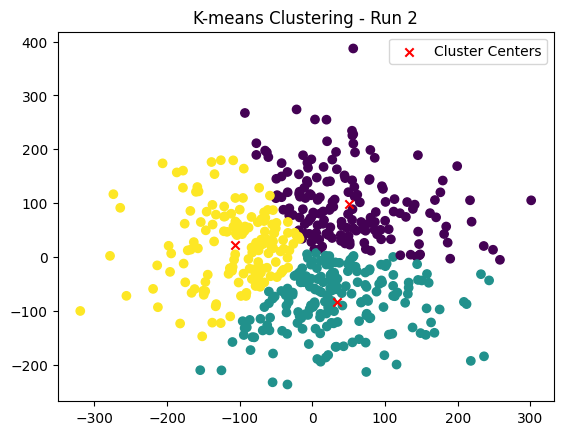

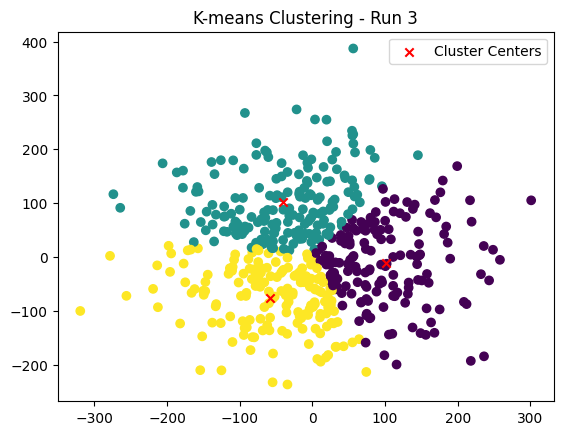

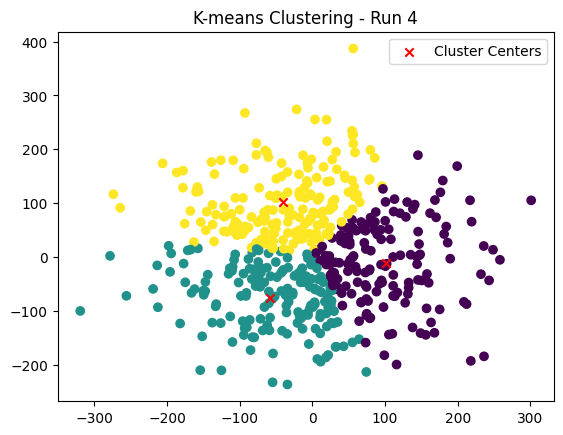

In [1]:
# Perform K-means clustering 4 times with random initializations and graphically represent the clustering results
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate a two-dimensional synthetic dataset consisting of 500 samples
n_samples = 500
n_features = 2
n_clusters = 6
# 'make_blobs' is used to generate a synthetic dataset with randomly generated data clusters
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters,  cluster_std=100.0, random_state=42)

# Convert the data to PyTorch tensors (numpy -> tensor)
X = torch.from_numpy(X).float()

# Set the number of clusters for k-means
n_clusters = 3

# Initialize lists to store labels and centers for each run
all_labels = []
all_centers = []

# Perform K-means clustering 4 times with random initializations
for i in range(4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=i)  # Using different random_state values allows obtaining different cluster centers at the beginning
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    all_labels.append(labels)
    all_centers.append(centers)

# Visualize the data and clusters for each run
for i in range(4):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=all_labels[i], cmap='viridis')
    plt.scatter(all_centers[i][:, 0], all_centers[i][:, 1], c='red', marker='x', label='Cluster Centers')
    plt.title(f'K-means Clustering - Run {i+1}')
    plt.legend()

plt.show()

# The Elbow Method to pick K value

The Elbow Method is a heuristic used to determine the optimal number of clusters (K) in a dataset for clustering algorithms like K-Means. It is a graphical approach that involves plotting the explained variation as a function of the number of clusters and looking for an "elbow" point on the plot. The idea is to select **the value of K where adding more clusters does not significantly improve** the model's performance.

ALgorithm of the Elbow Method:

* Run the clustering algorithm (e.g., K-Means) for a range of K values, typically from 1 to a larger number (e.g., 10 or 20).

* For each K, calculate a measure of the algorithm's performance, such as the sum of squared distances from each point to its assigned cluster center (i.e., inertia: within-cluster sum of squares).

* Plot the measure of performance (inertia) against the number of clusters (K).

* Look for the "elbow" point on the plot. The elbow point is where the inertia starts to decrease at a slower rate. In other words, it's the point where increasing the number of clusters doesn't lead to a significant improvement in performance.

* Select the K value corresponding to the elbow point as the optimal number of clusters.


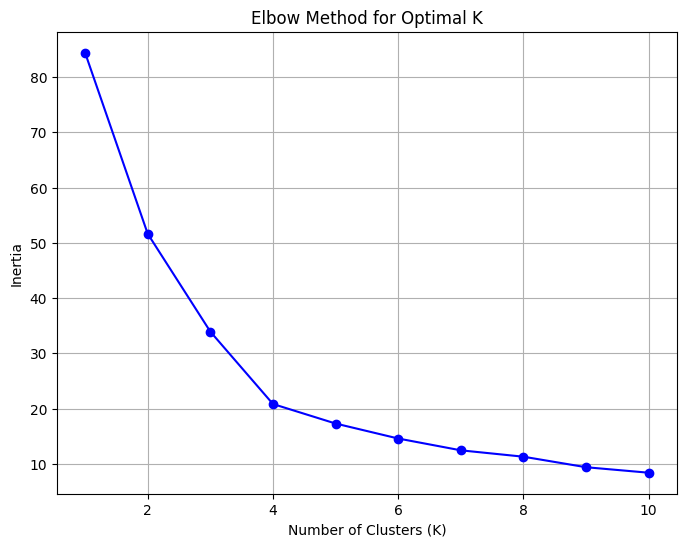

In [2]:
# Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Create an array of inertia values for different K values
inertias = [] # Inertia is the sum of the squared distances from each point to its assigned cluster center.

np.random.seed(0) # The random numbers generated will be the same every time the code is run.
X_new = np.random.rand(500, 2) # Generate an array of 500 samples, each with 2 random features ranging from 0 to 1.

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0) # random_state=0 means that the cluster centroids will be initialized randomly,
                                                  #  but always in the same way each time the code is run
                                                  # (the results will be reproducible if the code is executed with the same random.seed)
    kmeans.fit(X_new)
    inertias.append(kmeans.inertia_) # "inertias" will contain the inertia values for each k value.

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


Let's automatically calculate the optimum number of K for K-means Clustering.

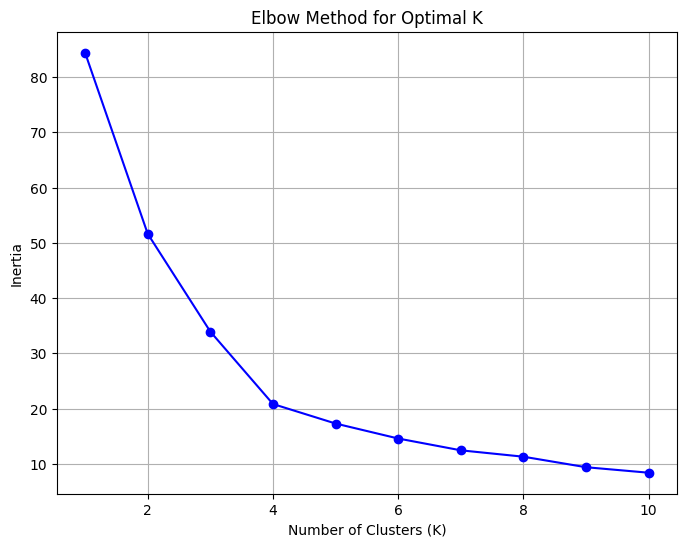

Optimal K value: 2


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

inertias = []

np.random.seed(0)
X_new = np.random.rand(500, 2)

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_new)
    inertias.append(kmeans.inertia_)

# -----------------------------NEW------------------------------------------------------------
deltas = np.diff(inertias) # Calculate the differences between consecutive values in the 'inertias' array
                           # which represents inertia for different values of K
k_optimal = np.where(deltas < 0.5 * deltas.max())[0][0] + 2
# k_optimal is the first index where the difference in inertia is less than half of the maximum inertia difference.
# Add 2 because the array starts at 0, while K starts at 1.
# -----------------------------NEW------------------------------------------------------------

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

print("Optimal K value:", k_optimal)


# BAG OF WORDS

The Bag of Words (BoW) model is a technique used for text analysis in **natural language processing**. It involves converting a text document into a vector of word counts.

How to perform Bag of Words:

Let's say we have a small corpus of text, which includes three documents:

Document 1: "The quick brown fox"
Document 2: "Jumped over the lazy dog"
Document 3: "The dog barked at the fox"

Step 1 - Tokenization: We need to tokenize the text, which means splitting each document into individual words. After tokenization, we have a list of words for each document:

Document 1: ["The", "quick", "brown", "fox"]
Document 2: ["Jumped", "over", "the", "lazy", "dog"]
Document 3: ["The", "dog", "barked", "at", "the", "fox"]

Step 2 - Create a Vocabulary: We create a list of all unique words in our corpus.

Vocabulary: ["The", "quick", "brown", "fox", "Jumped", "over", "the", "lazy", "dog", "barked", "at"]

Step 3 - Create a Document-Term Matrix: DTM where each row corresponds to a document, and each column corresponds to a word in the vocabulary. The cells contain the word counts for each word in each document.

| Document | The | quick | brown | fox | Jumped | over | lazy | dog | barked | at
|---|---|---|---|---|---|---|---|---|---|---|
|Document_1 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
|Document_2 | 1 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 0 |
|Document_3 | 2 | 0 | 0 | 1 | 0 | 0 | 0 | 1 | 1 | 1 | 1 |

This Document-Term Matrix represents the text data as a numerical format suitable for machine learning algorithms.

Below we generate a heatmap representing the "document-term matrix". Each row corresponds to a document, and each column represents a unique term in the corpus. The color intensity in the heatmap indicates the frequency of each term within the corresponding document.

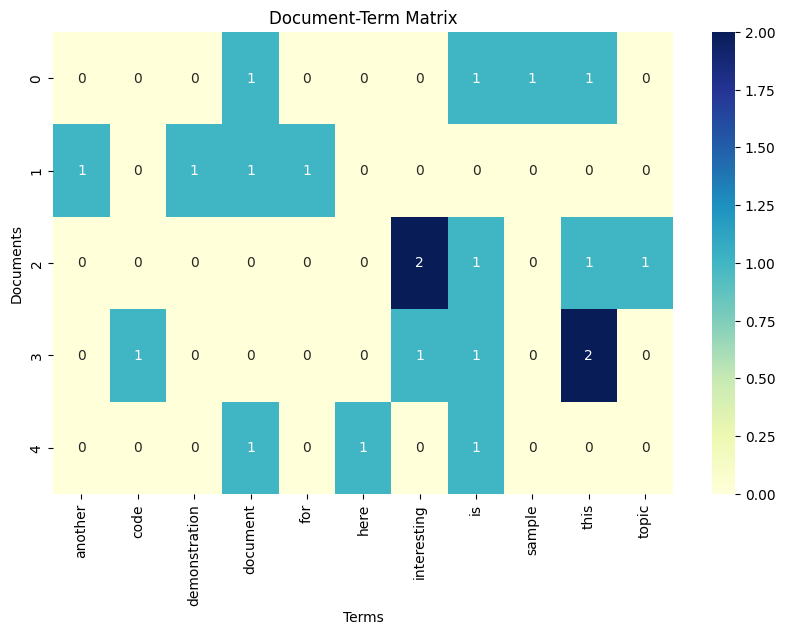

In [4]:
''' Generate a heatmap representing the 'document-term matrix'.
Each row corresponds to a document, and each column represents a unique term in the corpus.
The intensity of the color in the heatmap indicates the frequency of each term within its respective document.
'''

import numpy as np
import pandas as pd
import seaborn as sns # Seaborn is a data visualization library built on top of Matplotlib.
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# text
documents = ["This is a sample document.",
             "Another document for demonstration.",
             "This topic is interesting interesting.",
             "This this code is interesting.",
             "Document is here."]

# Create a Bag of Words (BoW) representation
vectorizer = CountVectorizer() # CountVectorizer is used to convert text into numerical data.
                               # Vectorizer counts how many times each word appears in the documents.
X = vectorizer.fit_transform(documents) # X: the BoW matrix contains the word frequencies in the documents
                                        # Each row of this matrix represents a document, and each column represents a word in the vocabulary
                                        # The values in the matrix indicate how many times each word appears in each document

# Convert the document-term matrix into a DataFrame for visualization
# The DataFrame "document_term_df" represents the BoW matrix in a tabular format with words as columns and documents as rows.
# Each value in the DataFrame indicates how many times a specific word appears in a given document.
document_term_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Visualize the document-term matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(document_term_df, annot=True, cmap="YlGnBu", fmt='d')
# annot=True indicates that the values of the BoW matrix will be displayed inside the cells of the plot
# cmap="YlGnBu" specifies the color map. "YlGnBu" represents a color scale from yellow to green to blue.
# fmt='d' specifies the format for displaying the values inside the plot's cells. "d" stands for integers.
plt.title('Document-Term Matrix')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()

#EXERCISE

## Merging bag of words with K-means clustering

* Generate 300 samples of text document, each has a length of 50 when the number of true clusters are 4. You can use the following command for this purpose.

`text = ''.join(random.choice(string.ascii_letters + string.digits + ' ') for _ in range(text_length))`

* Preprocess the text data and create BoW representation

* Determine the optimal number of clusters using silhouette coefficients when the number of clusters are between 2 to 10

* Select the optimal number of clusters (K) based on the highest silhouette coefficient using

`from sklearn.metrics import silhouette_score`

`silhouette_score(X, kmeans.fit_predict(input))`

* Apply K-means clustering with the selected K

* Evaluate the results with purity. Recall that for purity calculation we need to use true clusters.

`purity = max(completeness, homogeneity)`

You many use

`sklearn.metrics.homogeneity_score(labels_true, labels_pred)`

`sklearn.metrics.completeness_score(labels_true, labels_pred)`

$ Purity =$ $\frac{1}{N}$ $\sum_{k}$ $\max_{j} $ $ |C_k \cap T_j| $

$N$ is the total number of data points.

$k$ represents the clusters created by the clustering algorithm.

$j$ represents the true classes or ground truth labels.

$C_k$ is the set of data points in cluster $k$.

$T_j$ is the set of data points in true class $j$.

* Print out the highest silhouette score

* Print out the purity score




